In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
df = pd.read_csv("C:/Users/TUF/Downloads/SIH_PROJECT/dataset/rainfall_area-wt_sd_1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


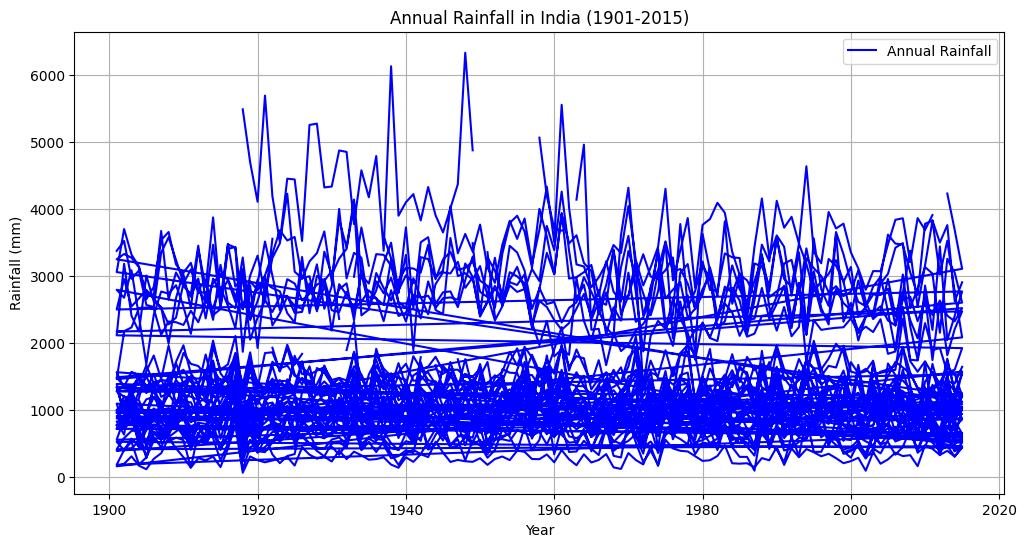

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['ANNUAL'], label="Annual Rainfall", color='blue')
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Annual Rainfall in India (1901-2015)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

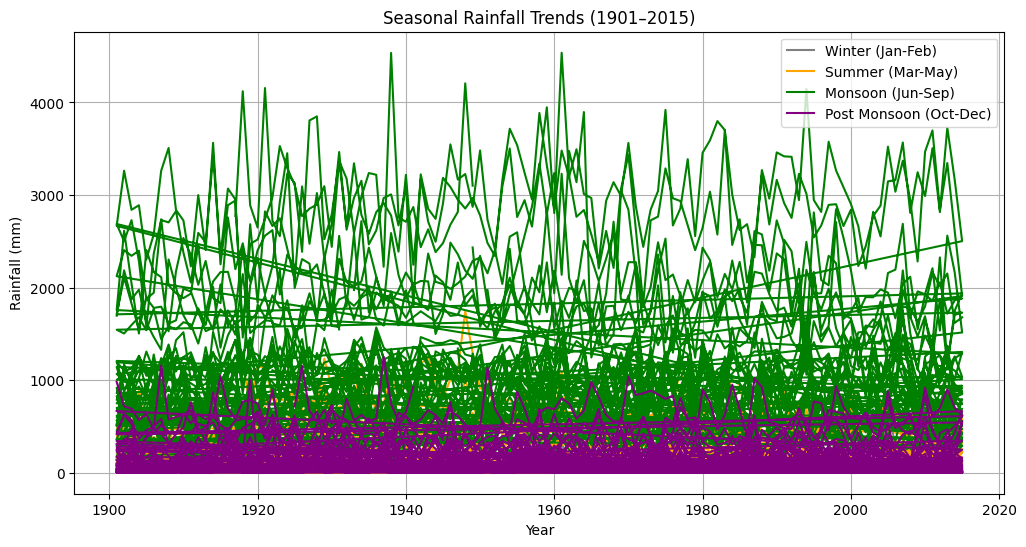

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['Jan-Feb'], label="Winter (Jan-Feb)", color='gray')
plt.plot(df['YEAR'], df['Mar-May'], label="Summer (Mar-May)", color='orange')
plt.plot(df['YEAR'], df['Jun-Sep'], label="Monsoon (Jun-Sep)", color='green')
plt.plot(df['YEAR'], df['Oct-Dec'], label="Post Monsoon (Oct-Dec)", color='purple')

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Seasonal Rainfall Trends (1901–2015)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
df['Annual_Rolling'] = df['ANNUAL'].rolling(window=10).mean()  

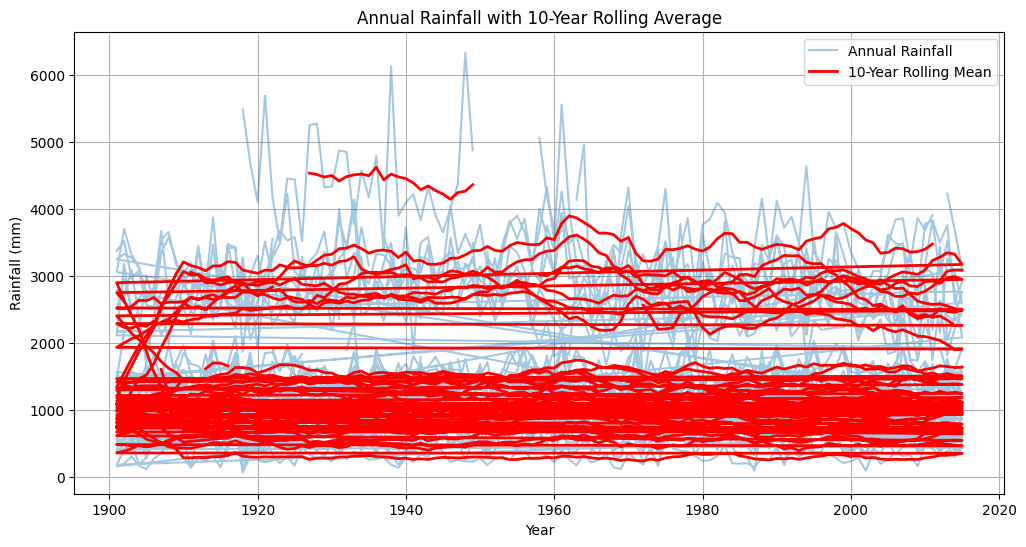

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['YEAR'], df['ANNUAL'], alpha=0.4, label="Annual Rainfall")
plt.plot(df['YEAR'], df['Annual_Rolling'], color='red', linewidth=2, label="10-Year Rolling Mean")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Annual Rainfall with 10-Year Rolling Average")
plt.legend()
plt.grid(True)
plt.show()

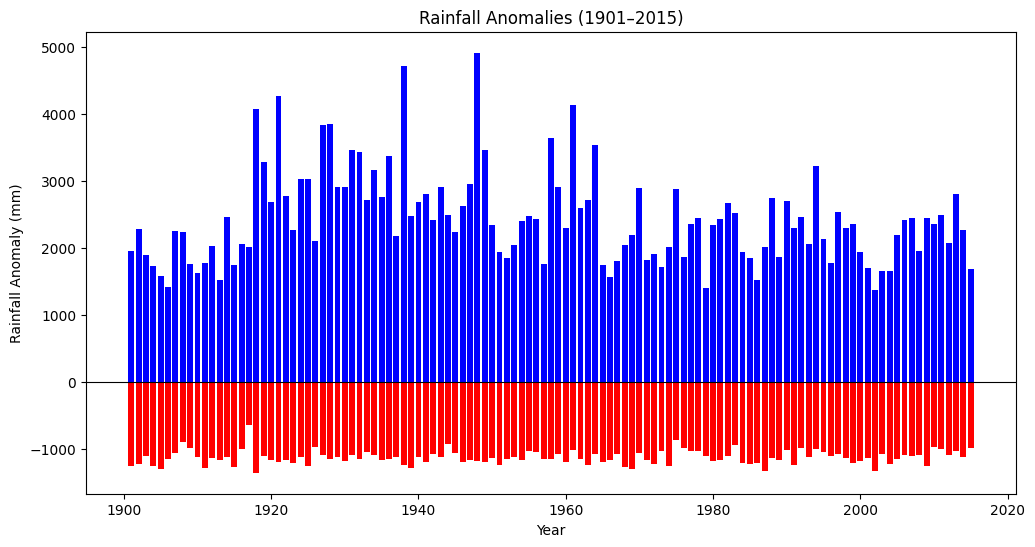

In [15]:
mean_rain = df['ANNUAL'].mean()
df['Anomaly'] = df['ANNUAL'] - mean_rain

plt.figure(figsize=(12,6))
plt.bar(df['YEAR'], df['Anomaly'], color=(df['Anomaly'] > 0).map({True: 'blue', False: 'red'}))
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel("Year")
plt.ylabel("Rainfall Anomaly (mm)")
plt.title("Rainfall Anomalies (1901–2015)")
plt.show()

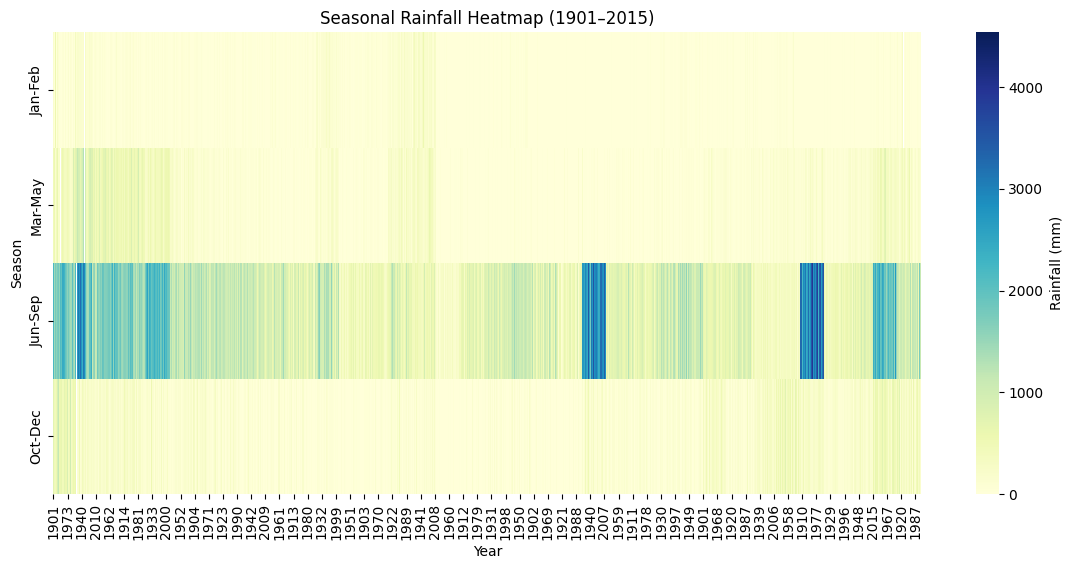

In [16]:
plt.figure(figsize=(14,6))

# Use correct seasonal columns
seasonal = df[['YEAR','Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']].set_index('YEAR')

sns.heatmap(seasonal.T, cmap="YlGnBu", cbar_kws={'label': 'Rainfall (mm)'})
plt.title("Seasonal Rainfall Heatmap (1901–2015)")
plt.ylabel("Season")
plt.xlabel("Year")
plt.show()

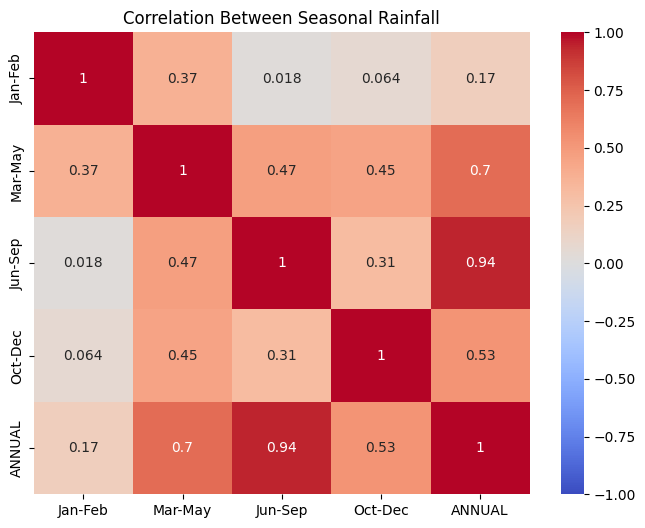

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(), 
    annot=True, 
    cmap="coolwarm", 
    vmin=-1, vmax=1
)
plt.title("Correlation Between Seasonal Rainfall")
plt.show()


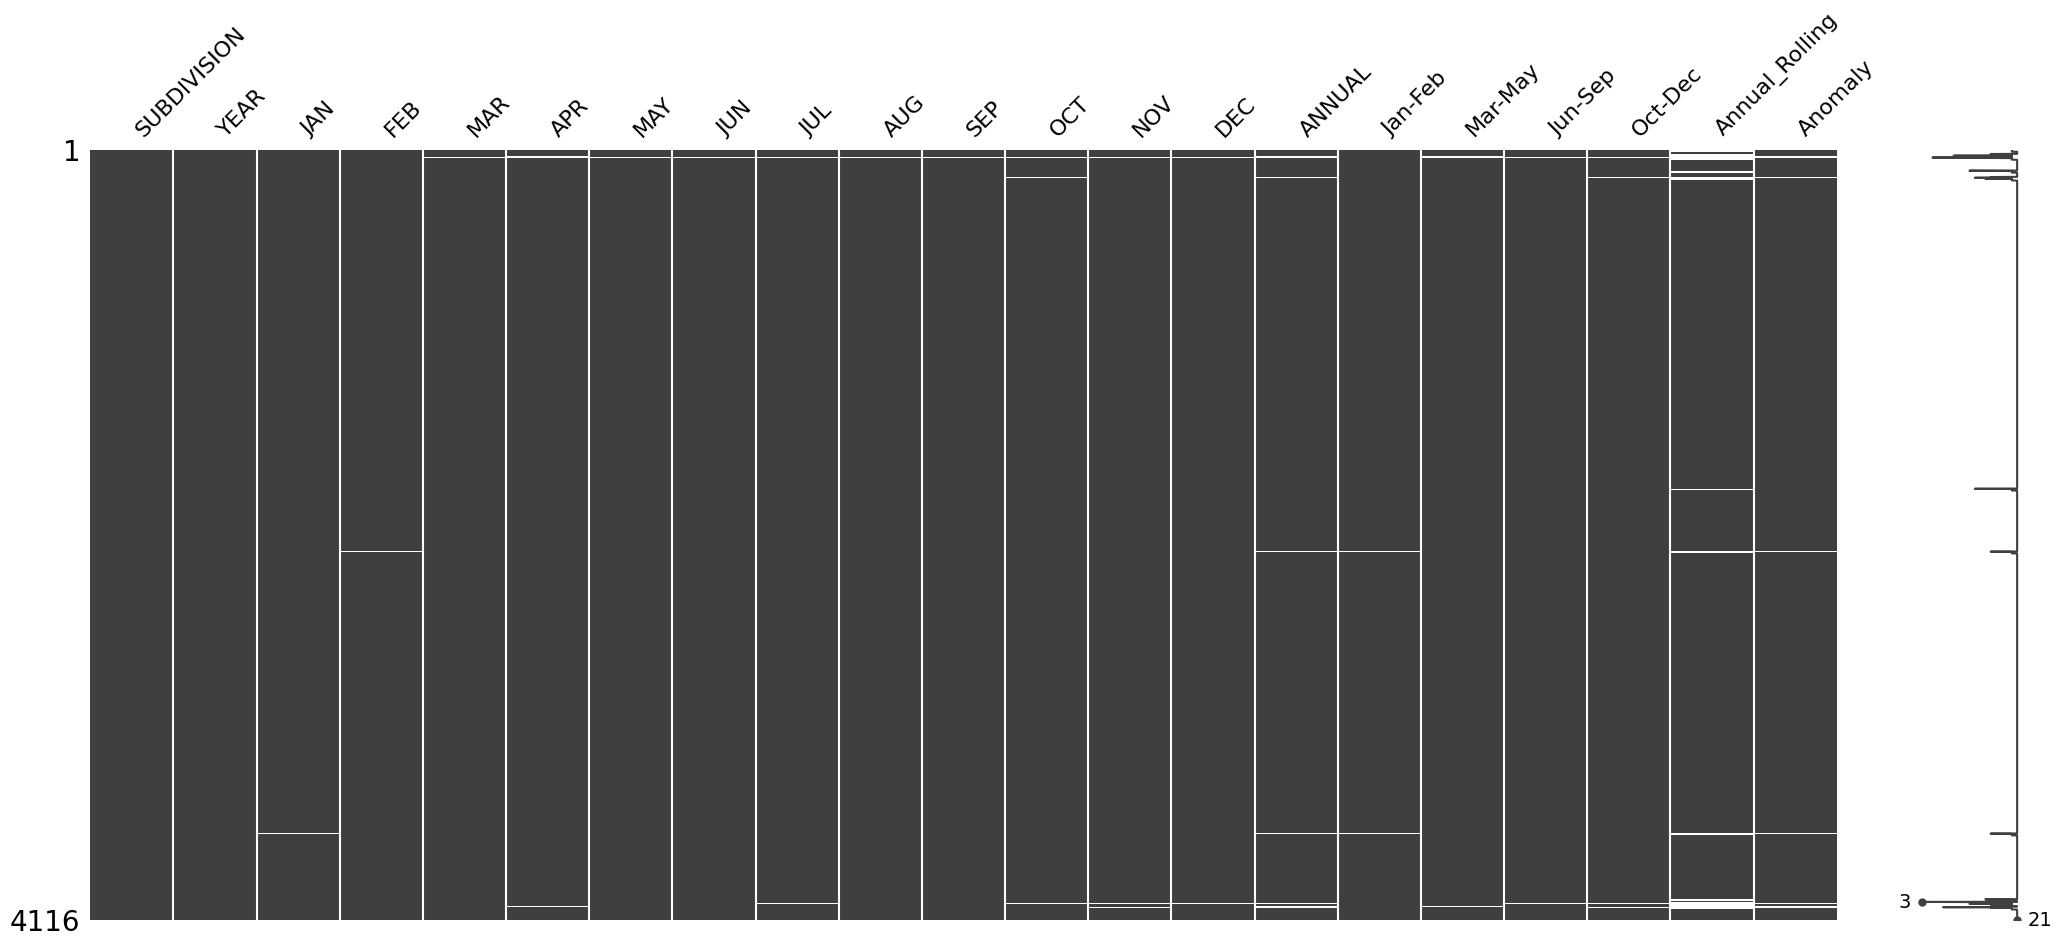

In [22]:
msno.matrix(df)
plt.show()

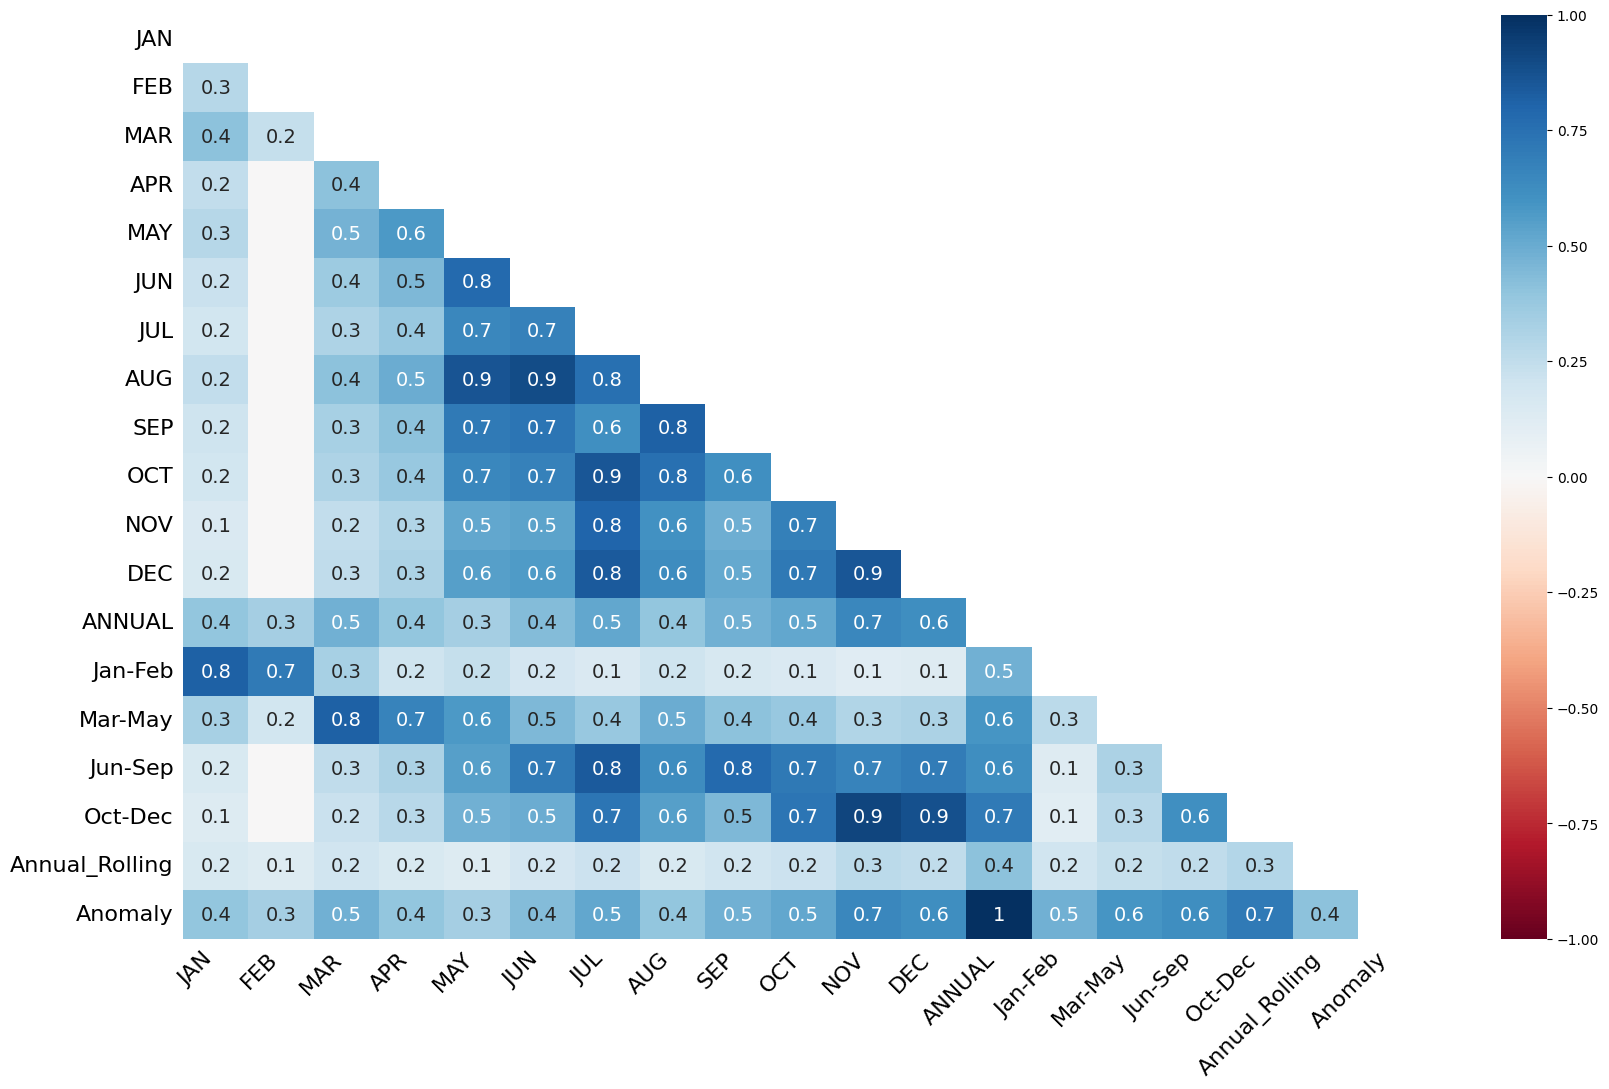

In [23]:
msno.heatmap(df)
plt.show()

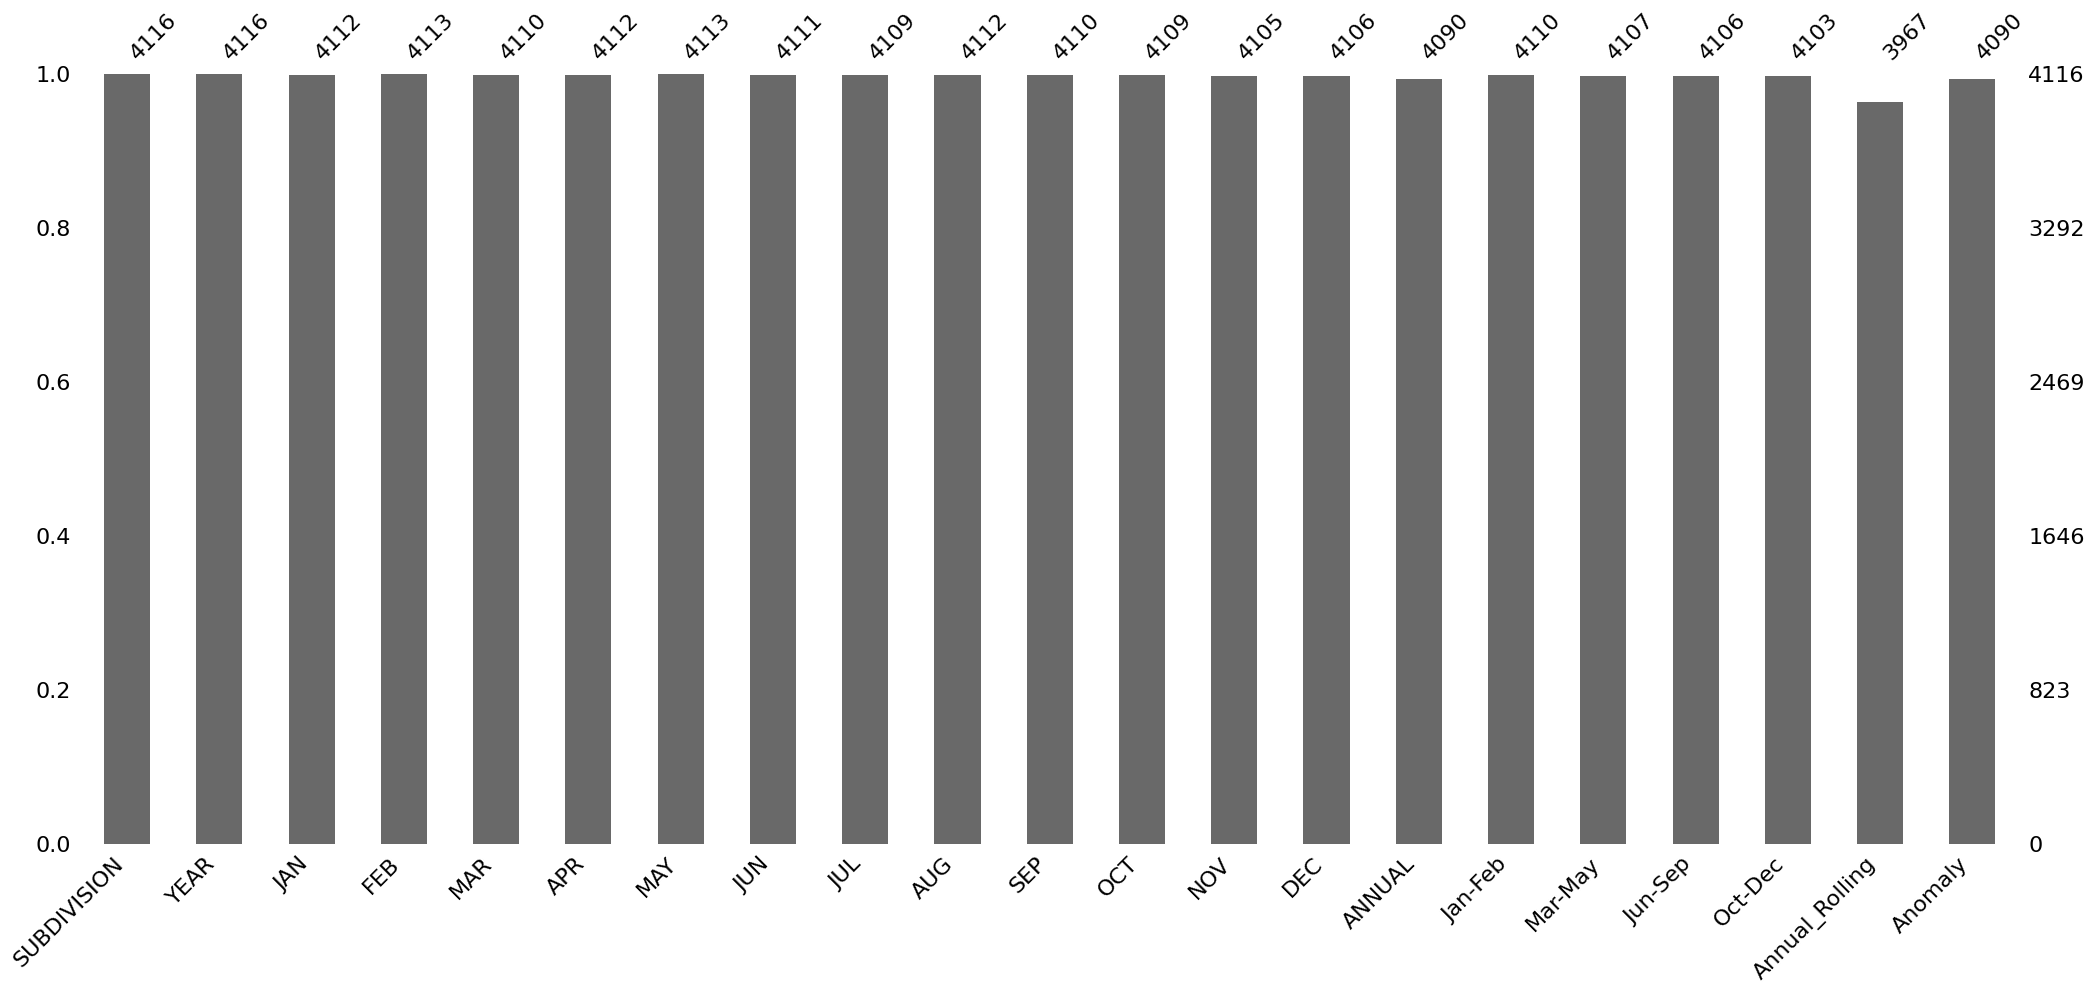

In [24]:
msno.bar(df)
plt.show()

C:\Users\TUF\AppData\Local\Temp\ipykernel_436\3766490898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")


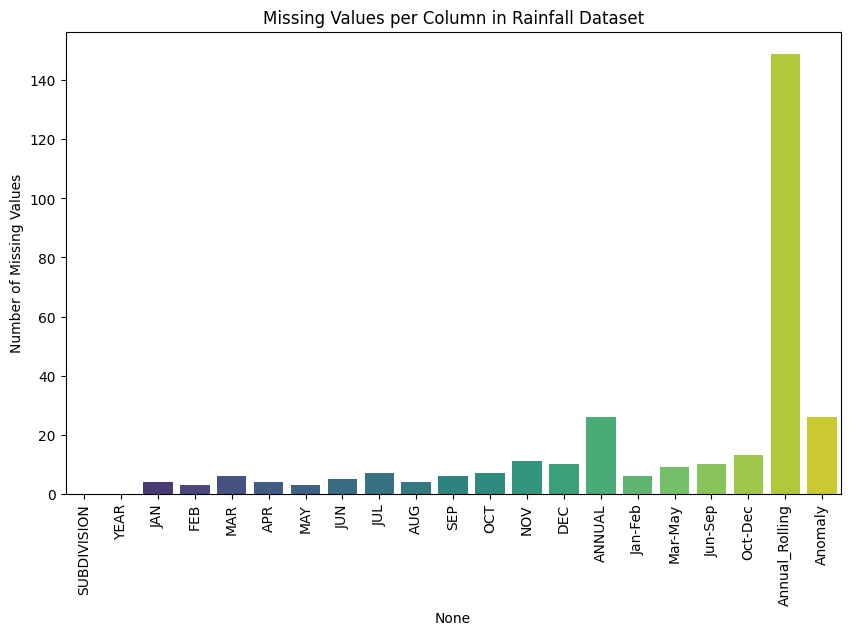

In [25]:
plt.figure(figsize=(10,6))
missing_counts = df.isnull().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")

plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column in Rainfall Dataset")
plt.show()
